---

_You are currently looking at **version 1.3** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 1 - Introduction to Machine Learning

For this assignment, you will be using the Breast Cancer Wisconsin (Diagnostic) Database to create a classifier that can help diagnose patients. First, read through the description of the dataset (below).

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
#print(cancer.DESCR) # Print the data set description

The object returned by `load_breast_cancer()` is a scikit-learn Bunch object, which is similar to a dictionary.

In [2]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

### Question 0 (Example)

How many features does the breast cancer dataset have?

*This function should return an integer.*

In [3]:
# You should write your whole answer within the function provided. The autograder will call
# this function and compare the return value against the correct solution value
def answer_zero():
    # This function returns the number of features of the breast cancer dataset, which is an integer. 
    # The assignment question description will tell you the general format the autograder is expecting
    return len(cancer['feature_names'])

# You can examine what your function returns by calling it in the cell. If you have questions
# about the assignment formats, check out the discussion forums for any FAQs
answer_zero() 

30

### Question 1

Scikit-learn works with lists, numpy arrays, scipy-sparse matrices, and pandas DataFrames, so converting the dataset to a DataFrame is not necessary for training this model. Using a DataFrame does however help make many things easier such as munging data, so let's practice creating a classifier with a pandas DataFrame. 



Convert the sklearn.dataset `cancer` to a DataFrame. 

*This function should return a `(569, 31)` DataFrame with * 

*columns = *

    ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']

*and index = *

    RangeIndex(start=0, stop=569, step=1)

In [4]:
cancer

{'DESCR': 'Breast Cancer Wisconsin (Diagnostic) Database\n=============================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance, field 3 i

In [5]:
def answer_one():
    pt1 = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
    pt2 = pd.DataFrame(data = cancer.target, columns = ['target'])
    df = pd.concat([pt1,pt2], axis = 1)
    return df

answer_one().head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Question 2
What is the class distribution? (i.e. how many instances of `malignant` (encoded 0) and how many `benign` (encoded 1)?)

*This function should return a Series named `target` of length 2 with integer values and index =* `['malignant', 'benign']`

In [6]:
def answer_two():
    cancerdf = answer_one()
    malignantcnt = (answer_one()['target'] == 0).sum()
    benigncnt = (answer_one()['target'] == 1).sum()
    target = pd.Series([malignantcnt,benigncnt], index=['malignant', 'benign'])    
    return target


answer_two()

malignant    212
benign       357
dtype: int64

### Question 3
Split the DataFrame into `X` (the data) and `y` (the labels).

*This function should return a tuple of length 2:* `(X, y)`*, where* 
* `X`*, a pandas DataFrame, has shape* `(569, 30)`
* `y`*, a pandas Series, has shape* `(569,)`.

In [7]:
def answer_three():
    cancerdf = answer_one()
    X = cancerdf.iloc[:,:30]
    y = cancerdf.iloc[:,30]
    #answer3tuple = (X,y)
    return (X,y)

answer_three()

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0         17.990         10.38          122.80     1001.0          0.11840   
 1         20.570         17.77          132.90     1326.0          0.08474   
 2         19.690         21.25          130.00     1203.0          0.10960   
 3         11.420         20.38           77.58      386.1          0.14250   
 4         20.290         14.34          135.10     1297.0          0.10030   
 5         12.450         15.70           82.57      477.1          0.12780   
 6         18.250         19.98          119.60     1040.0          0.09463   
 7         13.710         20.83           90.20      577.9          0.11890   
 8         13.000         21.82           87.50      519.8          0.12730   
 9         12.460         24.04           83.97      475.9          0.11860   
 10        16.020         23.24          102.70      797.8          0.08206   
 11        15.780         17.89          103.60     

### Question 4
Using `train_test_split`, split `X` and `y` into training and test sets `(X_train, X_test, y_train, and y_test)`.

**Set the random number generator state to 0 using `random_state=0` to make sure your results match the autograder!**

*This function should return a tuple of length 4:* `(X_train, X_test, y_train, y_test)`*, where* 
* `X_train` *has shape* `(426, 30)`
* `X_test` *has shape* `(143, 30)`
* `y_train` *has shape* `(426,)`
* `y_test` *has shape* `(143,)`

In [8]:
from sklearn.model_selection import train_test_split

def answer_four():
    X = answer_three()[0]
    y = answer_three()[1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    return (X_train, X_test, y_train, y_test)
    
answer_four()

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 293       11.850         17.46           75.54      432.7          0.08372   
 332       11.220         19.86           71.94      387.3          0.10540   
 565       20.130         28.25          131.20     1261.0          0.09780   
 278       13.590         17.84           86.24      572.3          0.07948   
 489       16.690         20.20          107.10      857.6          0.07497   
 346       12.060         18.90           76.66      445.3          0.08386   
 357       13.870         16.21           88.52      593.7          0.08743   
 355       12.560         19.07           81.92      485.8          0.08760   
 112       14.260         19.65           97.83      629.9          0.07837   
 68         9.029         17.33           58.79      250.5          0.10660   
 526       13.460         18.75           87.44      551.1          0.10750   
 206        9.876         17.27           62.92     

### Question 5
Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with `X_train`, `y_train` and using one nearest neighbor (`n_neighbors = 1`).

*This function should return a * `sklearn.neighbors.classification.KNeighborsClassifier`.

In [51]:
from sklearn.neighbors import KNeighborsClassifier

def answer_five():
    X_train, X_test, y_train, y_test = answer_four()
    knn = KNeighborsClassifier(n_neighbors = 1) #implementing classifier #was 1
    knn.fit(X_train, y_train) #testing classifier
    return knn
    
answer_five()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Question 6
Using your knn classifier, predict the class label using the mean value for each feature.

Hint: You can use `cancerdf.mean()[:-1].values.reshape(1, -1)` which gets the mean value for each feature, ignores the target column, and reshapes the data from 1 dimension to 2 (necessary for the precict method of KNeighborsClassifier).

*This function should return a numpy array either `array([ 0.])` or `array([ 1.])`*

In [52]:
def answer_six():
    cancerdf = answer_one()
    means = cancerdf.mean()[:-1].values.reshape(1, -1)
    label_prediction = answer_five().predict(means)   
    return label_prediction# Return your answer

answer_six()

array([1])

### Question 7
Using your knn classifier, predict the class labels for the test set `X_test`.

*This function should return a numpy array with shape `(143,)` and values either `0.0` or `1.0`.*

In [53]:
def answer_seven():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    labels_prediction = knn.predict(X_test)   
    return labels_prediction

answer_seven()

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

### Question 8
Find the score (mean accuracy) of your knn classifier using `X_test` and `y_test`.

*This function should return a float between 0 and 1*

In [54]:
def answer_eight():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()    
    return knn.score(X_test, y_test)

answer_eight()

0.9370629370629371

<IPython.core.display.Javascript object>


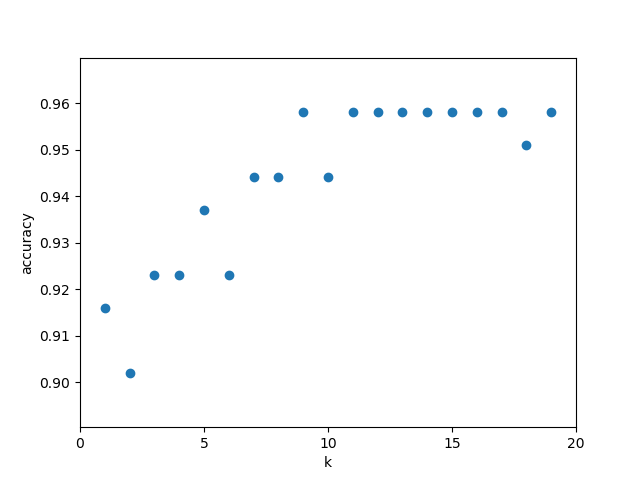

In [55]:
import matplotlib.pyplot as plt

k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)   
    knn.fit(answer_four()[0],answer_four()[2])
    scores.append(knn.score(answer_four()[1],answer_four()[3]))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);
plt.savefig('Learn')

### Optional plot

Try using the plotting function below to visualize the differet predicition scores between training and test sets, as well as malignant and benign cells.

In [43]:
def accuracy_plot():
    import matplotlib.pyplot as plt

    %matplotlib notebook

    X_train, X_test, y_train, y_test = answer_four()

    # Find the training and testing accuracies by target value (i.e. malignant, benign)
    mal_train_X = X_train[y_train==0]
    mal_train_y = y_train[y_train==0]
    ben_train_X = X_train[y_train==1]
    ben_train_y = y_train[y_train==1]

    mal_test_X = X_test[y_test==0]
    mal_test_y = y_test[y_test==0]
    ben_test_X = X_test[y_test==1]
    ben_test_y = y_test[y_test==1]

    knn = answer_five()

    scores = [knn.score(mal_train_X, mal_train_y), knn.score(ben_train_X, ben_train_y), 
              knn.score(mal_test_X, mal_test_y), knn.score(ben_test_X, ben_test_y)]


    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)

Uncomment the plotting function to see the visualization.

**Comment out** the plotting function when submitting your notebook for grading. 

<IPython.core.display.Javascript object>


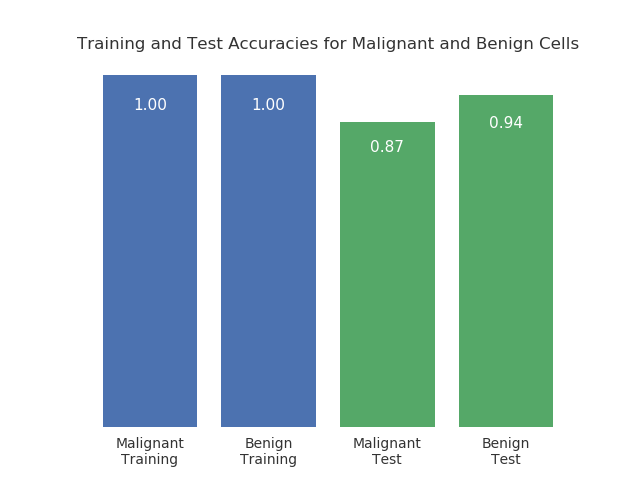

C:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [46]:
accuracy_plot() 